In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [18]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
ecommerce = pd.read_csv("./refined_ecommerce_product_data.csv")
df = ecommerce.copy()
df.head()

,Product_ID,Product_Name,Category,Sub_Category,Price,Customer_Age,Customer_Gender,Purchase_History,Review_Rating,Review_Sentiment
0,P0001,Sweater,Clothing,Pants,38.44,58,Male,16,2,Negative
1,P0002,Dining Table,Furniture,Chair,408.46,53,Female,4,5,Very Positive
2,P0003,Skincare Cream,Beauty,Hair Care,22.04,54,Male,7,2,Negative
3,P0004,Skincare Cream,Beauty,Makeup,145.24,27,Female,21,4,Neutral
4,P0005,Bluetooth Speaker,Electronics,Headphones,862.61,44,Female,27,5,Very Positive


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        8000 non-null   object 
 1   Product_Name      8000 non-null   object 
 2   Category          8000 non-null   object 
 3   Sub_Category      8000 non-null   object 
 4   Price             8000 non-null   float64
 5   Customer_Age      8000 non-null   int64  
 6   Customer_Gender   8000 non-null   object 
 7   Purchase_History  8000 non-null   int64  
 8   Review_Rating     8000 non-null   int64  
 9   Review_Sentiment  8000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 625.1+ KB


### Correlation Matrix

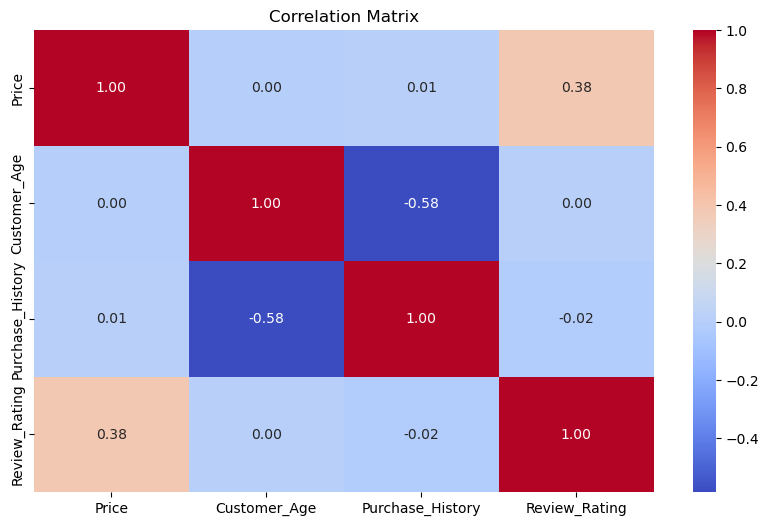

In [20]:
df_numerical = df.select_dtypes(include = ['Float64','int64'])
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Distribution of units sold by product categories

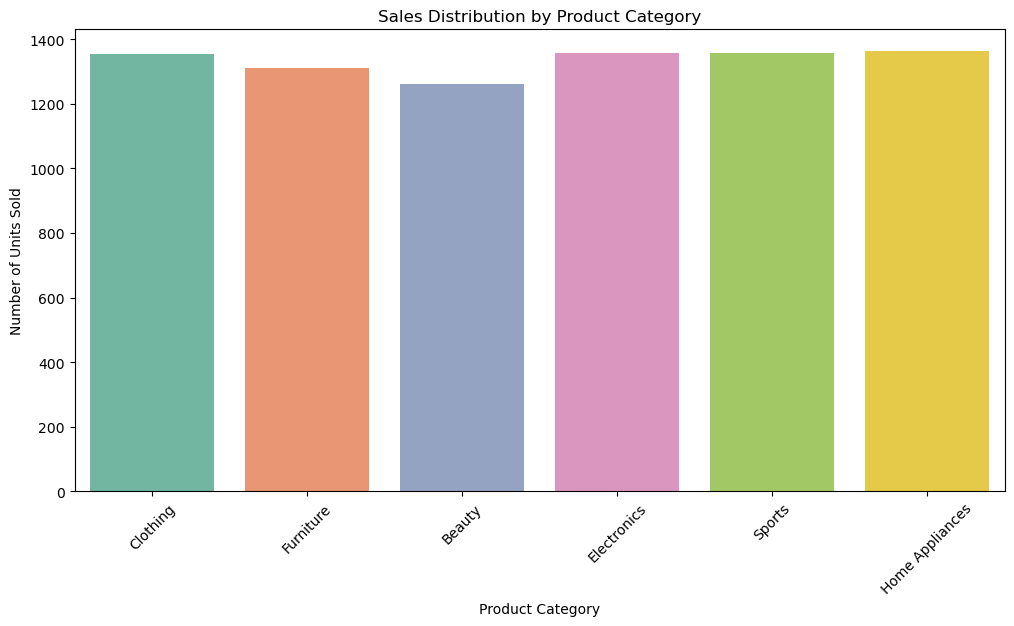

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', palette='Set2')
plt.title('Sales Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Units Sold')
plt.xticks(rotation=45)
plt.show()

### Price distribution

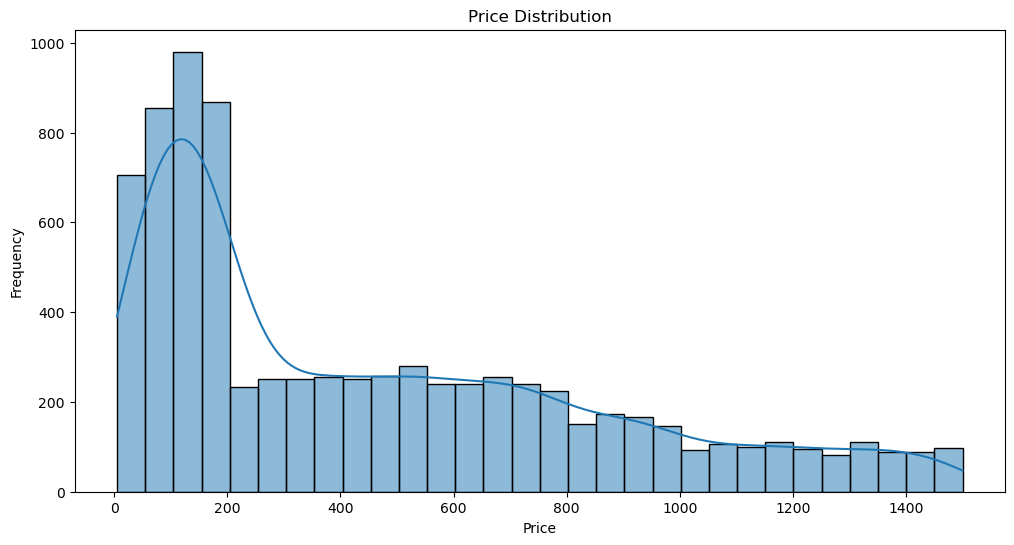

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Boxplot of Price by Product Category

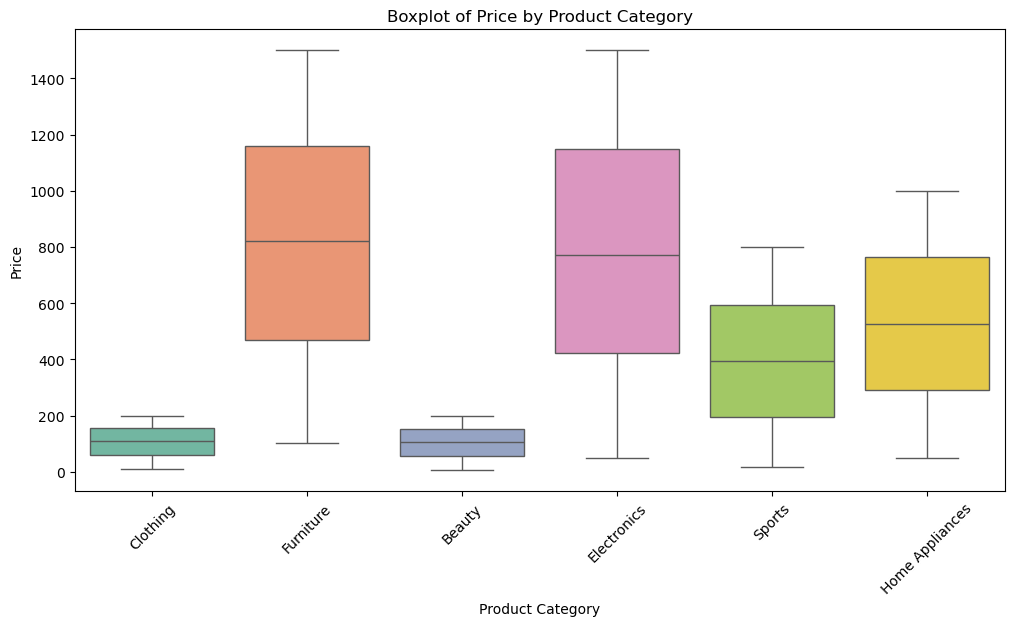

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='Price', palette='Set2')
plt.title('Boxplot of Price by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

### Product Price vs. Review Rating

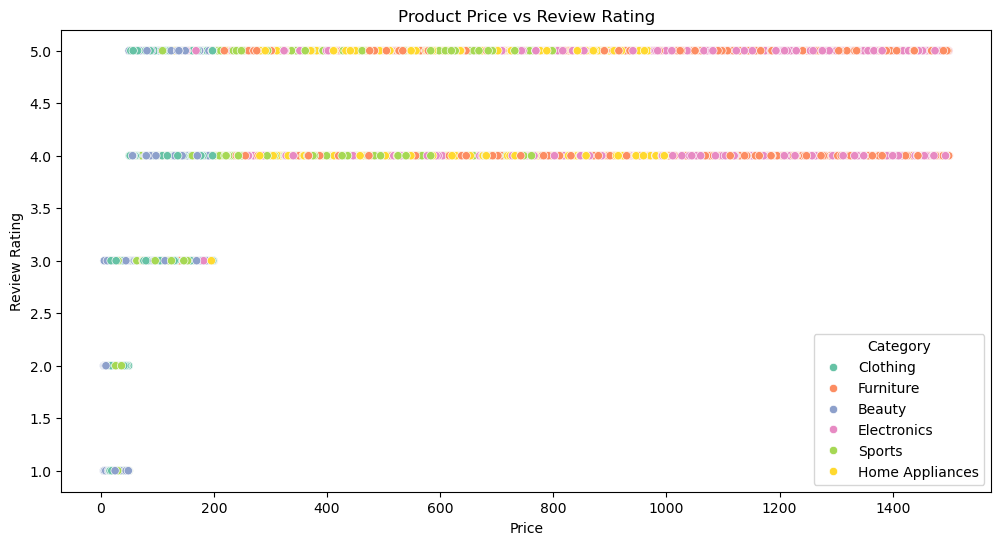

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Price', y='Review_Rating', hue='Category', palette='Set2')
plt.title('Product Price vs Review Rating')
plt.xlabel('Price')
plt.ylabel('Review Rating')
plt.show()


Average Rating by Product Category

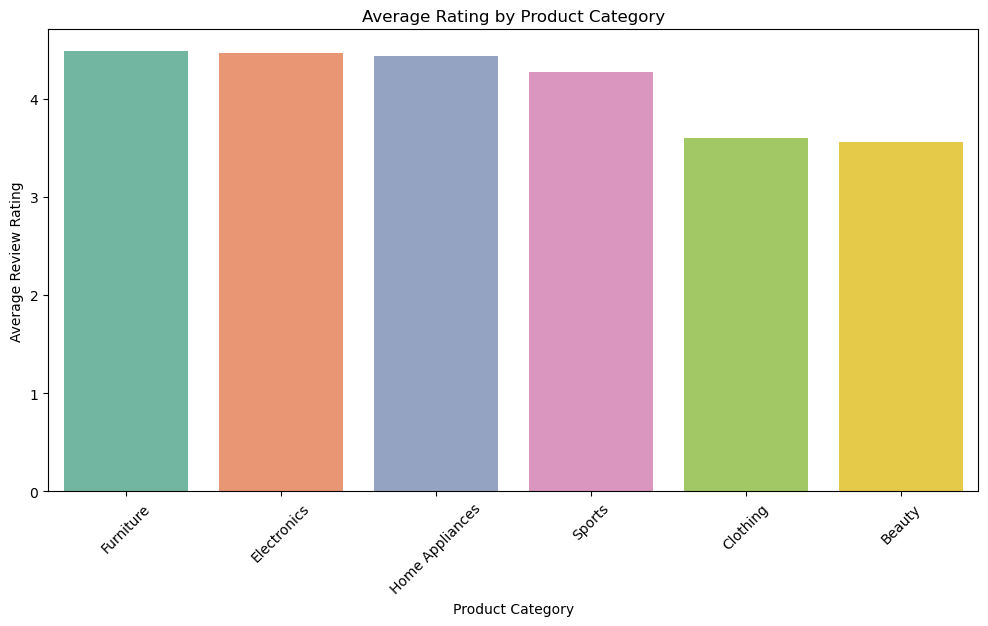

In [25]:
avg_rating = df.groupby('Category')['Review_Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='Set2')
plt.title('Average Rating by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Review Rating')
plt.xticks(rotation=45)
plt.show()


### Review Sentiment vs. Price 

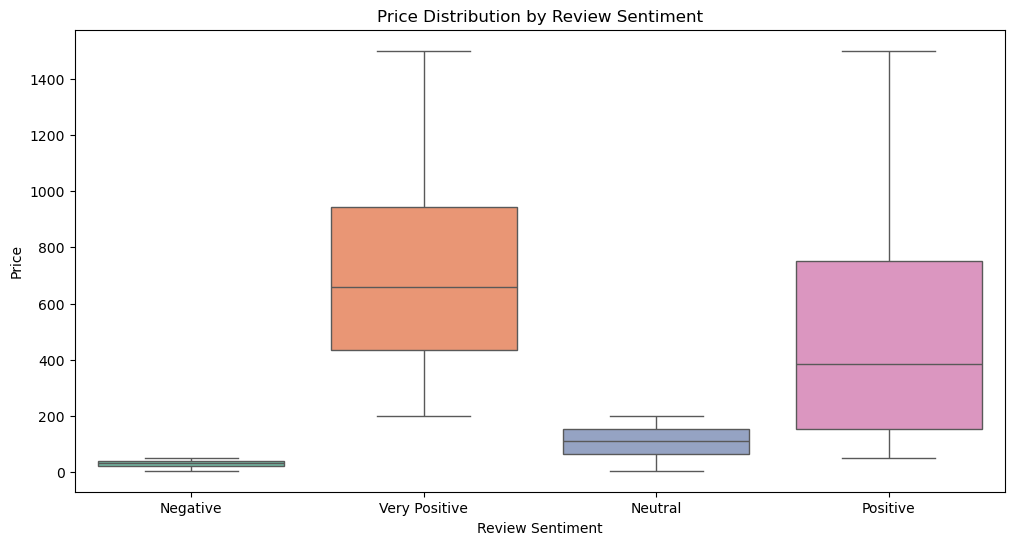

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Review_Sentiment', y='Price', palette='Set2')
plt.title('Price Distribution by Review Sentiment')
plt.xlabel('Review Sentiment')
plt.ylabel('Price')
plt.show()


### Purchase History by Age Group

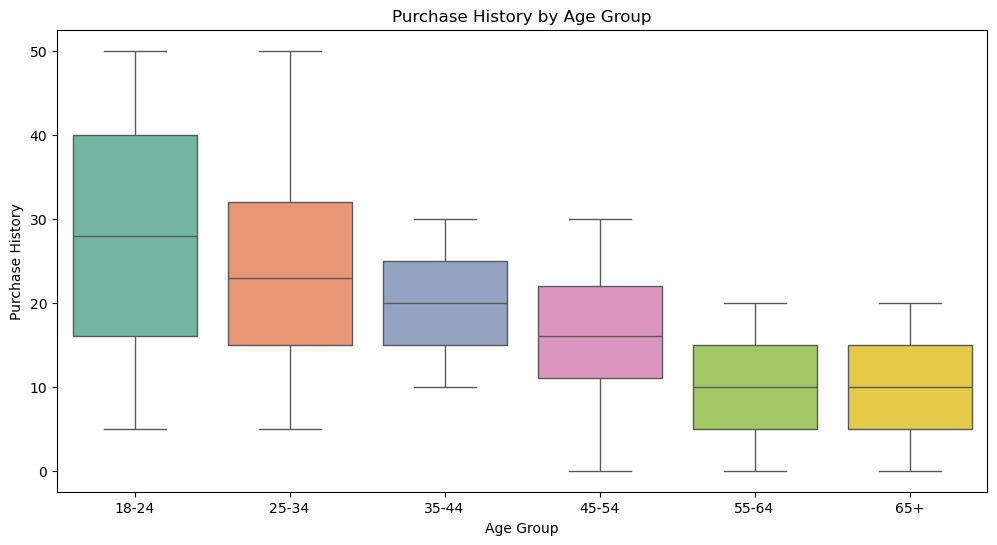

In [27]:
bins = [18, 24, 34, 44, 54, 64, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age_Group', y='Purchase_History', palette='Set2')
plt.title('Purchase History by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase History')
plt.show()


### Customer Age Distribution by Category

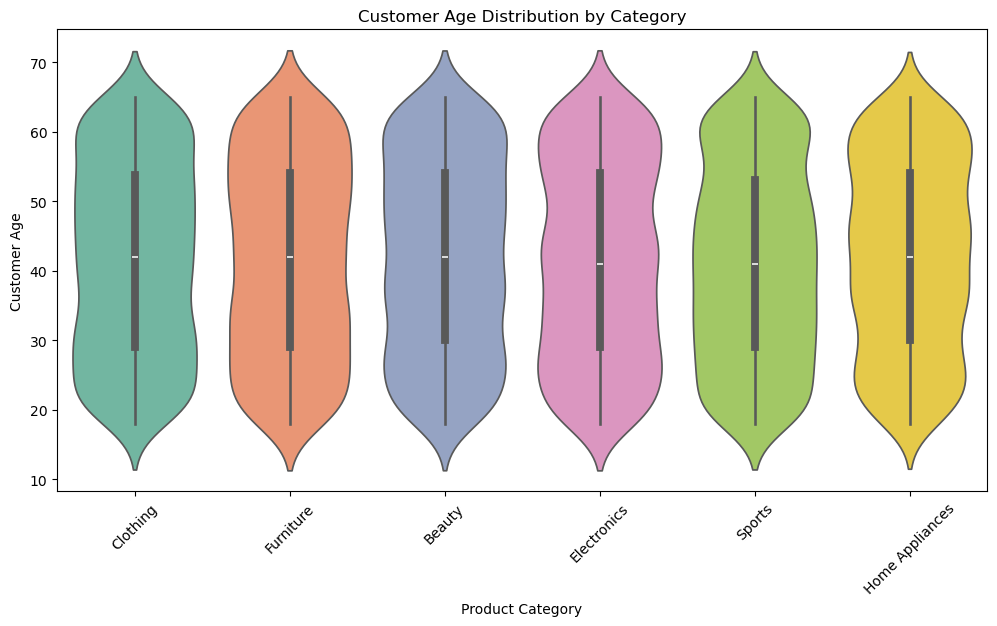

In [31]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Category', y='Customer_Age', palette='Set2')
plt.title('Customer Age Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Customer Age')
plt.xticks(rotation=45)
plt.show()


### Heatmap of Sentiment Distribution by Category and Gender

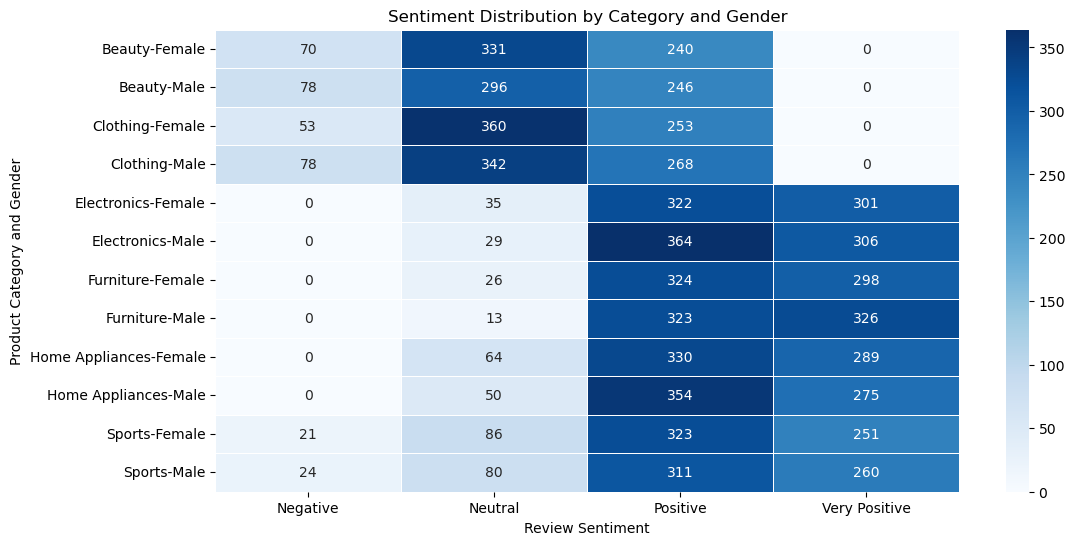

In [28]:
sentiment_gender_category = df.groupby(['Category', 'Customer_Gender', 'Review_Sentiment']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_gender_category, annot=True, cmap='Blues', fmt='g', linewidths=0.5)
plt.title('Sentiment Distribution by Category and Gender')
plt.xlabel('Review Sentiment')
plt.ylabel('Product Category and Gender')
plt.show()


### Price Distribution vs. Review Sentiment

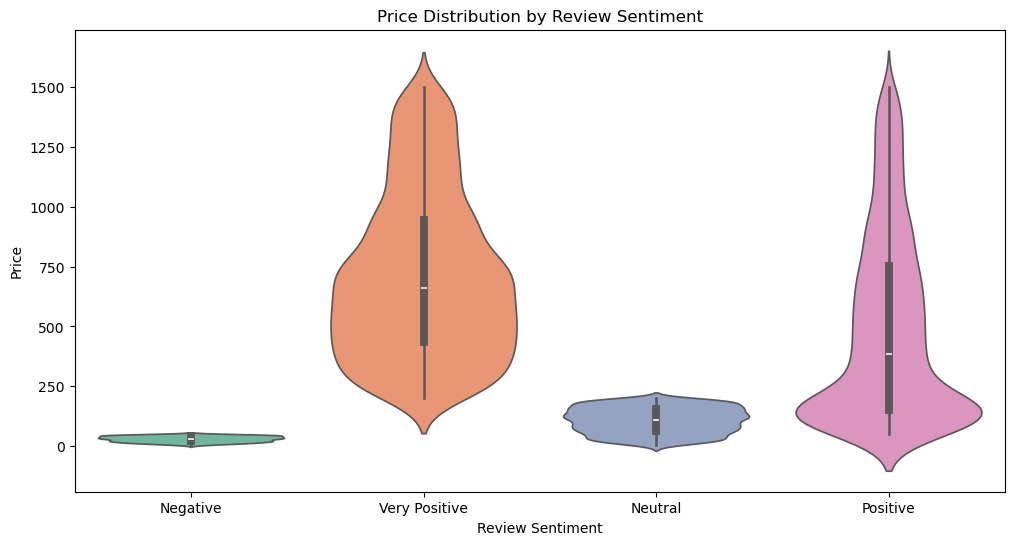

In [30]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Review_Sentiment', y='Price', palette='Set2')
plt.title('Price Distribution by Review Sentiment')
plt.xlabel('Review Sentiment')
plt.ylabel('Price')
plt.show()


### Categorical Distribution of Review Sentiment

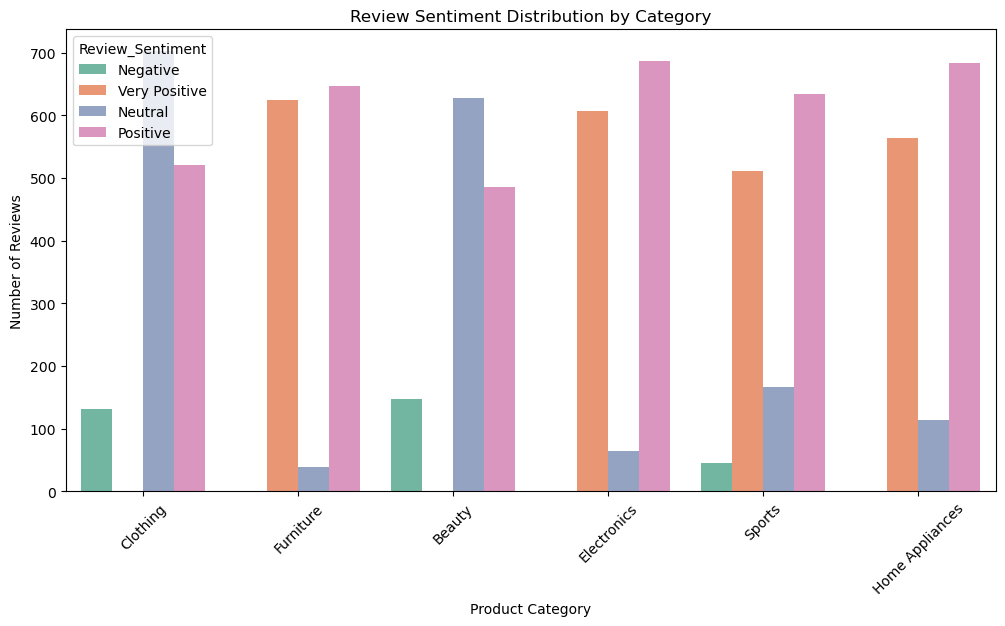

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', hue='Review_Sentiment', palette='Set2')
plt.title('Review Sentiment Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


### Total Sales by Category and Gender

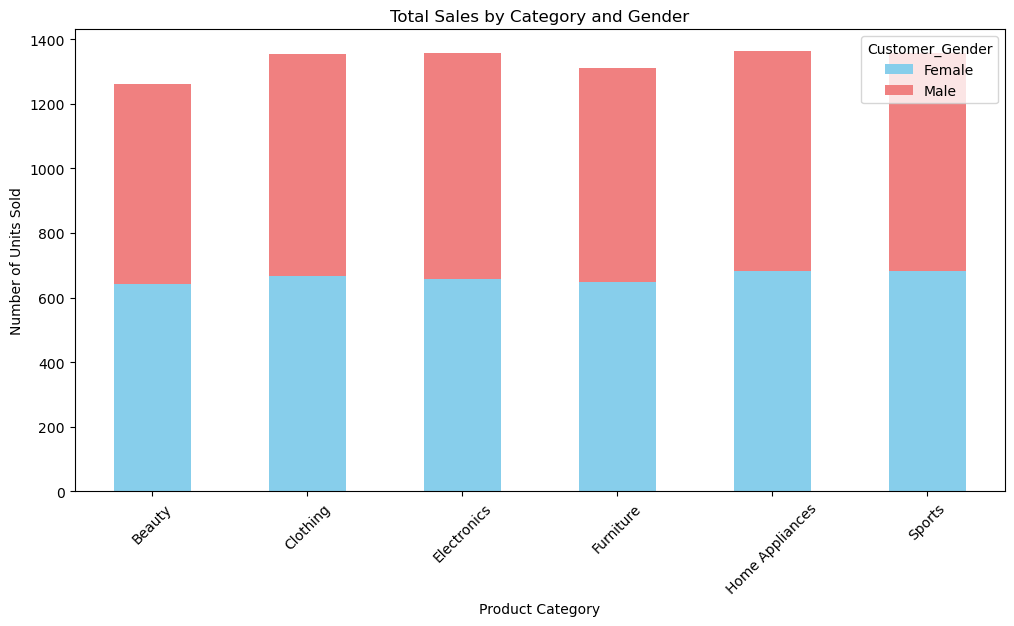

In [34]:
sales_gender_category = df.groupby(['Category', 'Customer_Gender']).size().unstack(fill_value=0)
sales_gender_category.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'lightcoral'])
plt.title('Total Sales by Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Number of Units Sold')
plt.xticks(rotation=45)
plt.show()

### Pairplot for Price, Review Rating, and Purchase History

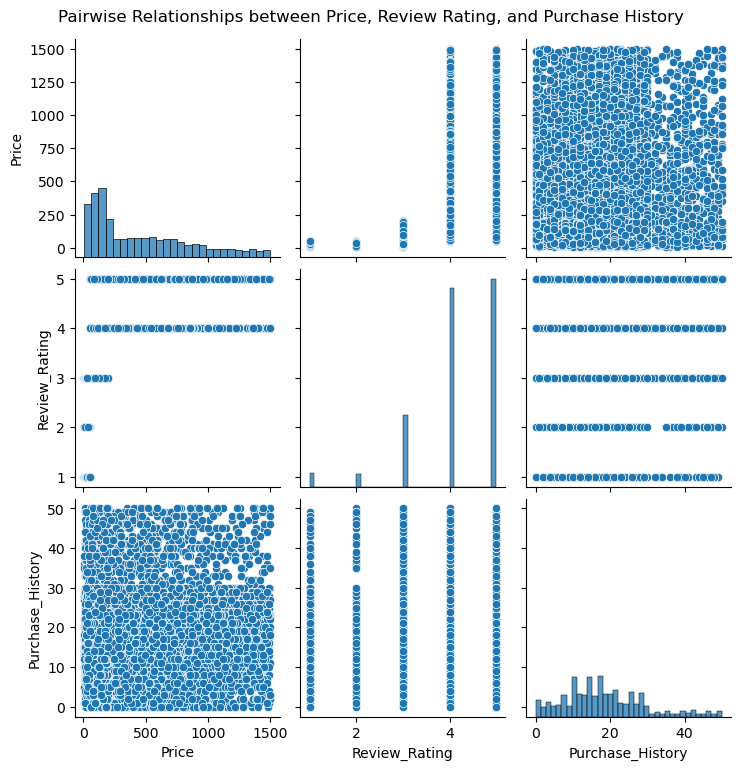

In [37]:
df_subset = df[['Price', 'Review_Rating', 'Purchase_History']]
sns.pairplot(df_subset)
plt.suptitle('Pairwise Relationships between Price, Review Rating, and Purchase History', y=1.02)
plt.show()
